In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# energygenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

# windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s. startswith('DE_wind_generation')),
#                         parse_dates=[0], index_col=0)


windgenFR = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('FR_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenPL = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('PL_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

windgenDK = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DK_wind_onshore_generation')),
                        parse_dates=[0], index_col=0)

In [3]:
# weatherdata = pd.read_csv("data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [4]:
# windspeed = pd.read_csv("data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE_windspeed')),
#                 parse_dates=[0], index_col=0)

windspeedFR = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('FR_windspeed')),
                parse_dates=[0], index_col=0)

windspeedDK = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DK_windspeed')),
                parse_dates=[0], index_col=0)

windspeedPL = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('PL_windspeed')),
                parse_dates=[0], index_col=0)

In [5]:
start_remove = pd.to_datetime('2016-01-01', utc = True)
end_remove = pd.to_datetime('2017-01-01', utc = True)

start_test = pd.to_datetime('2015-01-01', utc = True)
end_test = pd.to_datetime('2016-01-01', utc = True)

In [6]:
windspeedtrainFR = windspeedFR.loc[(windspeedFR.index >= start_remove) & (windspeedFR.index < end_remove)]
windgenerationtrainFR = windgenFR.loc[(windgenFR.index >= start_remove) & (windgenFR.index < end_remove)]

windspeedtestFR = windspeedFR.loc[(windspeedFR.index >= start_test) & (windspeedFR.index < end_test)]
windgenerationtestFR = windgenFR.loc[(windgenFR.index >= start_test) & (windgenFR.index < end_test)]

In [7]:
windspeedtrainDK = windspeedDK.loc[(windspeedDK.index >= start_remove) & (windspeedDK.index < end_remove)]
windgenerationtrainDK = windgenDK.loc[(windgenDK.index >= start_remove) & (windgenDK.index < end_remove)]

windspeedtestDK = windspeedDK.loc[(windspeedDK.index >= start_test) & (windspeedDK.index < end_test)]
windgenerationtestDK = windgenDK.loc[(windgenDK.index >= start_test) & (windgenDK.index < end_test)]

In [8]:
windspeedtrainPL = windspeedPL.loc[(windspeedPL.index >= start_remove) & (windspeedPL.index < end_remove)]
windgenerationtrainPL = windgenPL.loc[(windgenPL.index >= start_remove) & (windgenPL.index < end_remove)]

windspeedtestPL = windspeedPL.loc[(windspeedPL.index >= start_test) & (windspeedPL.index < end_test)]
windgenerationtestPL = windgenPL.loc[(windgenPL.index >= start_test) & (windgenPL.index < end_test)]

In [9]:
windspeedtrainFR = windspeedtrainFR.rename({"utc_timestamp": "timestamp", "FR_windspeed_10m": "windspeed"}, axis='columns')

In [10]:
windspeedtrainDK = windspeedtrainDK.rename({"utc_timestamp": "timestamp", "DK_windspeed_10m": "windspeed"}, axis='columns')

In [11]:
windspeedtrainPL = windspeedtrainPL.rename({"utc_timestamp": "timestamp", "PL_windspeed_10m": "windspeed"}, axis='columns')

In [12]:
windspeedformatted = pd.concat([windspeedtrainFR, windspeedtrainDK, windspeedtrainPL], sort=False)

In [13]:
# windspeedformatted

In [14]:
windgenerationtrainFR = windgenerationtrainFR.rename({"utc_timestamp": "timestamp", "FR_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [15]:
windgenerationtrainDK = windgenerationtrainDK.rename({"utc_timestamp": "timestamp", "DK_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [16]:
windgenerationtrainPL = windgenerationtrainPL.rename({"utc_timestamp": "timestamp", "PL_wind_onshore_generation_actual": "wind_generation"}, axis='columns')

In [17]:
windgenerationdataformatted = pd.concat([windgenerationtrainFR, windgenerationtrainDK, windgenerationtrainPL], sort=False)

In [18]:
#creating training data but cutting the data based on time stamp
# start_remove = pd.to_datetime('2016-01-01', utc = True)
# end_remove = pd.to_datetime('2017-01-01', utc = True)

# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')

# windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
# windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

In [19]:
#creating test/comparison data
# start_test = pd.to_datetime('2015-01-01', utc = True)
# end_test = pd.to_datetime('2016-01-01', utc = True)

# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')
# windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
# windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

In [20]:
# windspeedformatted

In [21]:
# windgenerationdataformatted

In [22]:
# max(windgenerationdataformatted['DE_wind_generation_actual'])

In [23]:
# min(windgenerationdataformatted['DE_wind_generation_actual'])

In [24]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

In [25]:
windgenerationtestFR = windgenerationtestFR * 1e-3

In [26]:
windgenerationtrainDK = windgenerationtrainDK * 1e-3

In [27]:
windgenerationtrainPL = windgenerationtrainPL * 1e-3

In [28]:
# windgenerationtest

In [29]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

In [30]:
#train test might not be valid for our case because we have timestamps in play
# xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [31]:
#inital model training attempt
# model = LinearRegression().fit(xtr,ytr)
# predicted = model.predict(windspeedformatted)

In [32]:
#attempt at cross validation
# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [33]:
#predict using train test split data
# predicted = model.predict(xts)

In [34]:
# predicted

In [35]:
#error when using model from cross validation
# predicted = model.predict(windspeedformatted)

In [36]:
#timeseries used as x axis when plotting predicted
# timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [37]:
# timeseries

In [38]:
# windgenerationdataformatted.plot(linewidth=0.5)

In [39]:
# I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
# plt.plot(timeseries,predicted, linewidth=0.5)

In [40]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN. Chose to only take 2016 for now
No wind data past 2016

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''

'\nTodo:\ntake in weather data and generation data\nseparate data into two sets:\nSolar\nX = [sun related weather columns] \nY = wind_generation_actual\nWind:\nX = [wind related weather columns] \nY = sun_generation_actual\n\nTrim data based on timestamp\nWind generation begins at 2010-01-01\nHowever there are values with NaN. Chose to only take 2016 for now\nNo wind data past 2016\n\nSolar generation begins at 2012-01-01\n\nTo try: if there are timestamps do I have to format data?\n'

In [41]:
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [42]:
#using the previously formatted data which is data from 2015
prediction = model.predict(windspeedtestFR)

In [43]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


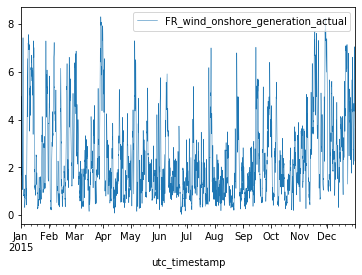

In [44]:
windgenerationtestFR.plot(linewidth=0.5)

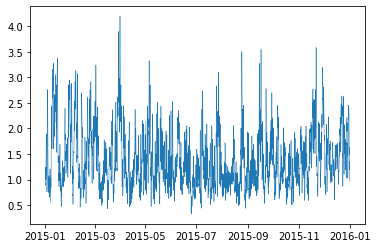

In [45]:
plt.plot(timeseries,prediction, linewidth=0.5)

In [46]:
from sklearn.metrics import r2_score
print(r2_score(windgenerationtestFR, prediction))

0.12654414162522098


In [47]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
print(mean_squared_error(windgenerationtestFR, prediction))

2.6946049229936806


In [48]:
# print(np.sum((windgenerationtest-prediction)**2)/(prediction.shape[0]))

In [49]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''

'\nTo do:\nFigure out mse (maybe normalize)\nfigure out cross validation fitting\nIncorportate more data (more times and more regions)\n\nNN model experimentation\n\nExpand to solar generation\n'

In [50]:
#
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [51]:
energy_production(windgenerationtestFR)

Energy Data measured in Giga Watts
Total energy: FR_wind_onshore_generation_actual    21090.859
dtype: float64
Average Energy Per Hour: FR_wind_onshore_generation_actual    2.407632
dtype: float64
Average Energy Per Day: FR_wind_onshore_generation_actual    57.783175
dtype: float64


In [52]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 12215.900376516858
Average Energy Per Hour: 1.3945091754014678
Average Energy Per Day: 33.46822020963523


In [53]:
# Train with DK, test with FR

In [54]:
DK_model = LinearRegression().fit(windspeedtrainDK,windgenerationtrainDK)

In [55]:
DK_prediction = DK_model.predict(windspeedtestFR)

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


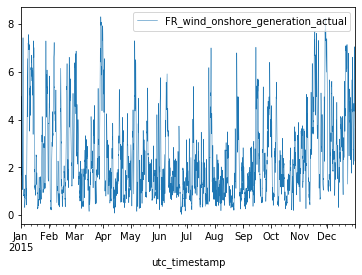

In [56]:
windgenerationtestFR.plot(linewidth=0.5)

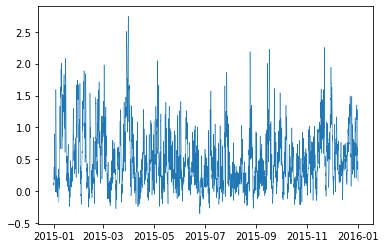

In [57]:
plt.plot(timeseries,DK_prediction, linewidth=0.5)

In [58]:
print(r2_score(windgenerationtestFR, DK_prediction))

-0.7967726855731061


In [59]:
#large number because we're deadling with large numbers
print(mean_squared_error(windgenerationtestFR, DK_prediction))

5.5430305694606234


In [60]:
energy_production(DK_prediction)

Energy Data measured in Giga Watts
Total energy: 4364.590694397038
Average Energy Per Hour: 0.4982409468489769
Average Energy Per Day: 11.957782724375445


In [61]:
# Train with PL, test with FR

In [62]:
PL_model = LinearRegression().fit(windspeedtrainPL,windgenerationtrainPL)

In [63]:
PL_prediction = PL_model.predict(windspeedtestFR)

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


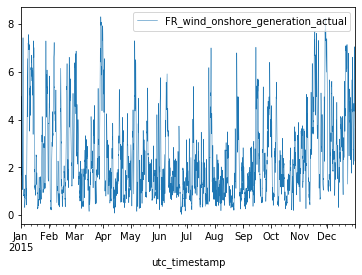

In [64]:
windgenerationtestFR.plot(linewidth=0.5)

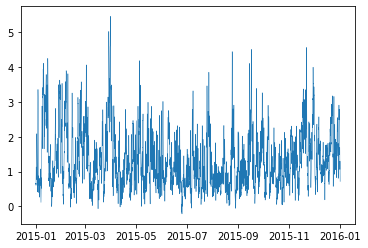

In [65]:
plt.plot(timeseries,PL_prediction, linewidth=0.5)

In [66]:
print(r2_score(windgenerationtestFR, PL_prediction))

0.23903969090356525


In [67]:
#large number because we're deadling with large numbers
print(mean_squared_error(windgenerationtestFR, PL_prediction))

2.347556977761126


In [68]:
energy_production(PL_prediction)

Energy Data measured in Giga Watts
Total energy: 11811.3518030277
Average Energy Per Hour: 1.348327831395856
Average Energy Per Day: 32.35986795350055
